In [1]:
import os
import re
import pandas as pd

os.chdir('C:\\Users\\aroha\\OneDrive\\Documents\\Personal Projects\\Arohan-Viraj\\enron_with_categories')
path = 'C:\\Users\\aroha\\OneDrive\\Documents\\Personal Projects\\Arohan-Viraj\\enron_with_categories'

combined_content = []
for filename in os.listdir(os.getcwd()):
  try:
    filename_ = int(filename)
    os.chdir(str(path+"\\"+filename))
    for file in os.listdir(os.getcwd()):
      if 'txt' in file.split('.'):
        with open(file,'r') as f:
          content = f.read()
          remove_pattern = r'^(From:|To:|Date:|Subject:|X-From:|X-To:|X-cc:|X-bcc:|X-Folder:|X-Origin|X-FileName|Message-ID:|Cc:|Mime-Version:|Content-Type:|Content-Transfer-Encoding:|Bcc:).*\n'
          email_pattern  = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
          cleaned_email  = re.sub(remove_pattern,'',content,flags=re.MULTILINE)
          cleaned_email  = re.sub(email_pattern,'',cleaned_email,flags=re.MULTILINE)
          combined_content.append(cleaned_email)
  except:pass
print(len(combined_content))


1702


In [2]:
os.chdir('C:\\Users\\aroha\\OneDrive\\Documents\\Personal Projects\\Arohan-Viraj\\enron_with_categories')
path = 'C:\\Users\\aroha\\OneDrive\\Documents\\Personal Projects\\Arohan-Viraj\\enron_with_categories'

labels_all = []
for filename in os.listdir():
  try:
    filenname_ = int(filename)
    os.chdir(path+"\\"+filename)
    for file in os.listdir(os.getcwd()):
      if 'cats' in file.split('.'):
        with open(file,'r') as f:
          labels_all.append(f.read())
  except:pass


labels_needed = []
for i in labels_all:
  mid_var=[]
  last_var=[]
  for j in i:
    if j==',':
      pass
    elif j=='\n':
      mid_var.append(last_var)
      last_var=[]
    else:last_var.append(j)
  labels_needed.append(mid_var)
print(labels_needed)


  
  

[[['1', '1', '1'], ['2', '6', '1'], ['2', '1', '3', '1'], ['3', '3', '1']], [['1', '1', '2'], ['3', '6', '2'], ['4', '1', '0', '2']], [['1', '1', '1'], ['1', '6', '1'], ['2', '1', '1'], ['2', '2', '2'], ['3', '6', '2'], ['3', '7', '1'], ['4', '1', '0', '2']], [['1', '1', '2'], ['2', '1', '2'], ['2', '2', '2'], ['3', '6', '2'], ['3', '1', '0', '2']], [['1', '1', '1'], ['3', '6', '1'], ['3', '1', '0', '1'], ['4', '1', '0', '1']], [['1', '1', '2'], ['2', '9', '2'], ['3', '7', '2']], [['1', '1', '2'], ['2', '9', '2'], ['3', '7', '2'], ['3', '1', '0', '1']], [['1', '1', '1'], ['2', '1', '1'], ['2', '2', '1'], ['2', '1', '3', '1'], ['3', '3', '1'], ['3', '4', '1'], ['4', '1', '0', '1']], [['1', '1', '2'], ['2', '2', '2']], [['1', '1', '2'], ['2', '1', '2'], ['2', '2', '2'], ['3', '9', '2']], [['1', '1', '2'], ['2', '1', '2'], ['2', '2', '2'], ['3', '9', '2']], [['1', '1', '2'], ['3', '1', '2'], ['3', '6', '2']], [['1', '1', '2'], ['1', '4', '2'], ['3', '4', '2'], ['3', '6', '2']], [['1', '1'

In [3]:
final_labels = []
actual_labels=[]
for i in labels_needed:
  actual_labels=[]
  for j in i:
    if j[0]=='1':
      actual_labels.append(j[1])
  var=[]
  if len(actual_labels)>1:
    char=''
    for k in range(len(actual_labels)):
      if k+1==len(actual_labels):
        char=char+actual_labels[k]
      else:char=char+actual_labels[k]+' '
    var.append(char)
  else: var=actual_labels

  final_labels.append(var)
print(final_labels) 


[['1'], ['1'], ['1 6'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1 4'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1 4'], ['1'], ['1'], ['1'], ['1'], ['1 4'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1 3'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1 8'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1 4'], ['1'], ['1'], ['1'], ['1 4'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1

In [4]:
data = {'Emails':combined_content,'Labels':final_labels}
df   = pd.DataFrame(data)
df.shape

(1702, 2)

In [5]:
df.to_excel('C:\\Users\\aroha\\OneDrive\\Documents\\Personal Projects\\Arohan-Viraj\\enron_with_categories\\combined_excel.xlsx')

In [6]:
os.chdir(path)
dataset = pd.read_excel('combined_excel.xlsx')

In [7]:
dataset = dataset[['Emails','Labels']]

In [8]:
dataset.tail()

,Emails,Labels
1697,"\n, Palmer",['8']
1698,\ntest,['8']
1699,\ntesting,['8']
1700,\n----- Forwarded by Richard B Sanders/HOU/ECT...,['8']
1701,\n---------------------- Forwarded by Mary Hai...,['8']


In [9]:
import string
def remove_punctuation(text):
  return ''.join([i for i in text if i not in string.punctuation])
dataset['Emails']=dataset['Emails'].apply(lambda x:remove_punctuation(x))
dataset['Emails']

0       \t  \n\t\n\n Forwarded by Steven J KeanHOUEES ...
1       \nIn anticipation of potential litigation invo...
2       \nJulia and Stevehere are some questions Ive s...
3       \nJulia and Stevehere are some questions Ive s...
4       \nIn anticipation of potential litigation invo...
                              ...                        
1697                                            \n Palmer
1698                                               \ntest
1699                                            \ntesting
1700    \n Forwarded by Richard B SandersHOUECT on 091...
1701    \n Forwarded by Mary HainHOUECT on 02012000 09...
Name: Emails, Length: 1702, dtype: object

In [10]:
dataset['Emails'] = dataset['Emails'].apply(lambda x:x.lower())
dataset.loc[0,'Emails']

'\t  \n\t\n\n forwarded by steven j keanhouees on 101899 0846 \nam \n\n\nkaren denneenron\n101899 0708 am\ncc  \n\n\n forwarded by karen dennecorpenron on 101899 0707 \nam \n\n\nandrew morrisonect\n101899 0343 am\ncc iona macleanlonectect \n\nkaren\n\nhere it is\n\nplenty of good houston input here as well as europe\n\nan excellent general article has resulted nice pictures too  ill get some \noriginal copies couriered over to you asap\n\nwe are organising bilingual reprints  please let iona know how many youd \nlike\n\nthanks\n\nandrew\n forwarded by andrew morrisonlonect on 101899 0943 \nam \n   \n\tenron capital  trade resources corp\n\t\n\tfrom  gls                            \n101599 0949 am\n\t\n\ncc  \n\n\n  enrondoc\n\n\n\n\n'

In [11]:
def remove_unwanted_characters(text):
  return text.replace('\n','').replace('\t','')  
dataset['Emails']=dataset['Emails'].apply(lambda x: remove_unwanted_characters(x))
dataset.loc[0,'Emails']

'   forwarded by steven j keanhouees on 101899 0846 am karen denneenron101899 0708 amcc   forwarded by karen dennecorpenron on 101899 0707 am andrew morrisonect101899 0343 amcc iona macleanlonectect karenhere it isplenty of good houston input here as well as european excellent general article has resulted nice pictures too  ill get some original copies couriered over to you asapwe are organising bilingual reprints  please let iona know how many youd likethanksandrew forwarded by andrew morrisonlonect on 101899 0943 am    enron capital  trade resources corpfrom  gls                            101599 0949 amcc    enrondoc'

In [12]:
def remove_numeric(text):
  return re.sub(r'\d+','',text)
dataset['Emails'] = dataset['Emails'].apply(lambda x: remove_numeric(x))
dataset['Emails']

0          forwarded by steven j keanhouees on   am ka...
1       in anticipation of potential litigation involv...
2       julia and stevehere are some questions ive sen...
3       julia and stevehere are some questions ive sen...
4       in anticipation of potential litigation involv...
                              ...                        
1697                                               palmer
1698                                                 test
1699                                              testing
1700     forwarded by richard b sandershouect on   pm ...
1701     forwarded by mary hainhouect on   am cc  revi...
Name: Emails, Length: 1702, dtype: object

In [13]:
dataset['Labels'] = dataset['Labels'].apply(lambda x: x.split('[')[1])


In [14]:
dataset['Labels'] = dataset['Labels'].apply(lambda x: x.split(']')[0])


In [15]:
dataset['Labels']

0         '1'
1         '1'
2       '1 6'
3         '1'
4         '1'
        ...  
1697      '8'
1698      '8'
1699      '8'
1700      '8'
1701      '8'
Name: Labels, Length: 1702, dtype: object

In [16]:
def fun(text):
  text=text.replace("'",'')
  if len(text)>1:
    return text[1]
  else:return text[0]
dataset['Labels'] = dataset['Labels'].apply(lambda x: fun(x))
dataset['Labels']

0       1
1       1
2        
3       1
4       1
       ..
1697    8
1698    8
1699    8
1700    8
1701    8
Name: Labels, Length: 1702, dtype: object

In [17]:
dataset_new = dataset[dataset['Labels']!=" "]
dataset_new['Labels'].value_counts()

Labels
1    740
4    411
6    133
3     80
5     62
2     30
7     21
8     18
Name: count, dtype: int64

In [18]:
dataset_new['Labels'] = dataset_new['Labels'].apply(lambda x: int(x))

C:\Users\aroha\AppData\Local\Temp\ipykernel_20108\2304657078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Labels'] = dataset_new['Labels'].apply(lambda x: int(x))


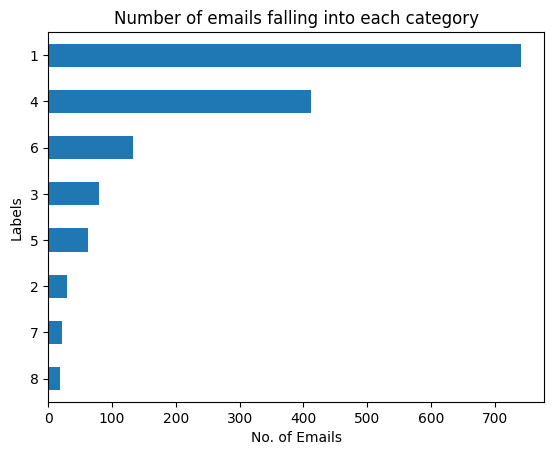

In [42]:
import matplotlib.pyplot as plt
dataset_new.groupby('Labels').Emails.count().sort_values().plot.barh()
plt.xlabel('No. of Emails')
plt.title('Number of emails falling into each category')
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True,min_df=5,ngram_range=(1,1),stop_words='english')

features = vectorizer.fit_transform(dataset_new.Emails).toarray()
labels   = dataset_new.Labels

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=1)

In [22]:
import numpy as np
y_test = np.array(y_test)
y_test.reshape(-1,1)
print(y_test.shape)

(299,)


In [23]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


from sklearn import metrics


models=[LinearSVC(),RandomForestClassifier(),MultinomialNB(),LogisticRegression()]


for model in models:
  model=model.fit(X_train,y_train)

for model in models:
  y_pred = model.predict(X_test)
  print(f'Classification report of {type(model).__name__}\n is {metrics.classification_report(y_test,y_pred)} \n')

c:\Users\aroha\OneDrive\Documents\Personal Projects\Arohan-Viraj\enron_with_categories\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classification report of LinearSVC
 is               precision    recall  f1-score   support

           1       0.75      0.81      0.78       151
           2       1.00      0.29      0.44         7
           3       0.40      0.31      0.35        13
           4       0.69      0.70      0.69        86
           5       0.71      0.50      0.59        10
           6       0.50      0.48      0.49        25
           7       0.00      0.00      0.00         5
           8       0.33      0.50      0.40         2

    accuracy                           0.69       299
   macro avg       0.55      0.45      0.47       299
weighted avg       0.69      0.69      0.68       299
 

Classification report of RandomForestClassifier
 is               precision    recall  f1-score   support

           1       0.67      0.86      0.75       151
           2       1.00      0.14      0.25         7
           3       0.29      0.15      0.20        13
           4       0.66      0.60      

c:\Users\aroha\OneDrive\Documents\Personal Projects\Arohan-Viraj\enron_with_categories\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aroha\OneDrive\Documents\Personal Projects\Arohan-Viraj\enron_with_categories\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aroha\OneDrive\Documents\Personal Projects\Arohan-Viraj\enron_with_categories\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

In [24]:
f1_score_SVC = metrics.classification_report(y_test.reshape(-1,1),models[0].predict(X_test).reshape(-1,1))
print(f1_score_SVC)

              precision    recall  f1-score   support

           1       0.75      0.81      0.78       151
           2       1.00      0.29      0.44         7
           3       0.40      0.31      0.35        13
           4       0.69      0.70      0.69        86
           5       0.71      0.50      0.59        10
           6       0.50      0.48      0.49        25
           7       0.00      0.00      0.00         5
           8       0.33      0.50      0.40         2

    accuracy                           0.69       299
   macro avg       0.55      0.45      0.47       299
weighted avg       0.69      0.69      0.68       299



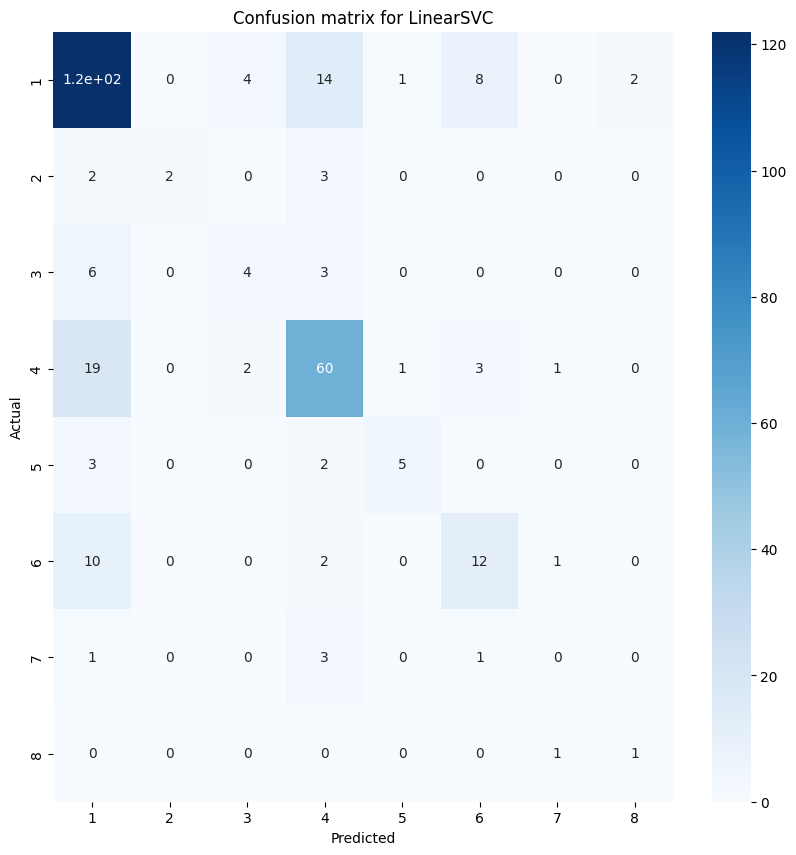

In [37]:
import seaborn as sns

model = models[0]
conf_matrix = metrics.confusion_matrix(y_test.reshape(-1,1),model.predict(X_test).reshape(-1,1))

plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',xticklabels=[1,2,3,4,5,6,7,8],yticklabels=[1,2,3,4,5,6,7,8])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion matrix for {type(model).__name__}')
plt.show()

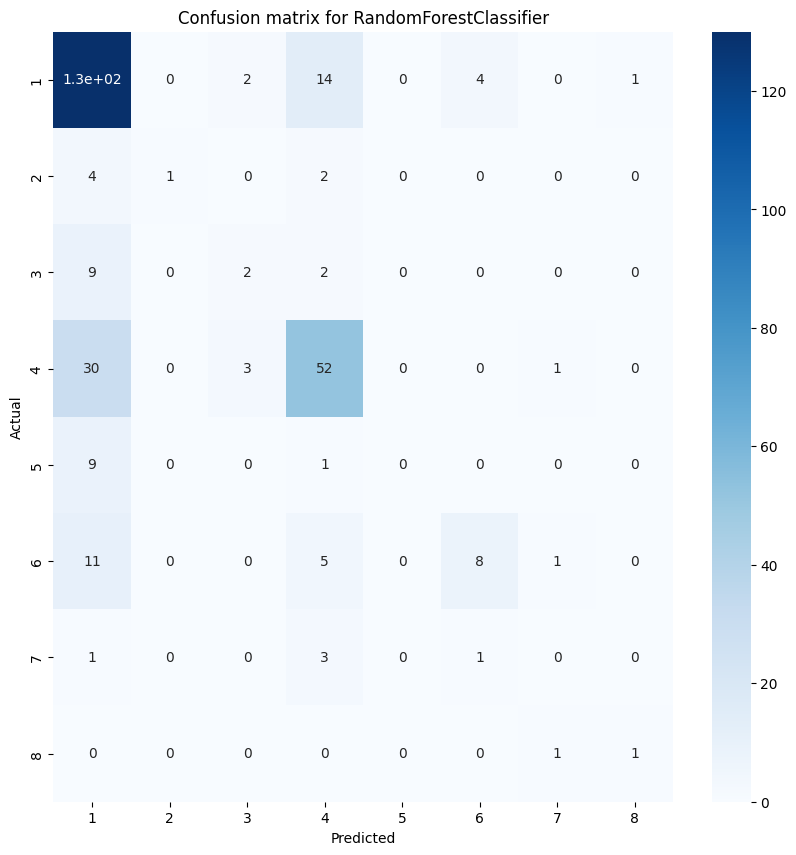

In [38]:
import seaborn as sns

model = models[1]
conf_matrix = metrics.confusion_matrix(y_test.reshape(-1,1),model.predict(X_test).reshape(-1,1))

plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',xticklabels=[1,2,3,4,5,6,7,8],yticklabels=[1,2,3,4,5,6,7,8])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion matrix for {type(model).__name__}')
plt.show()

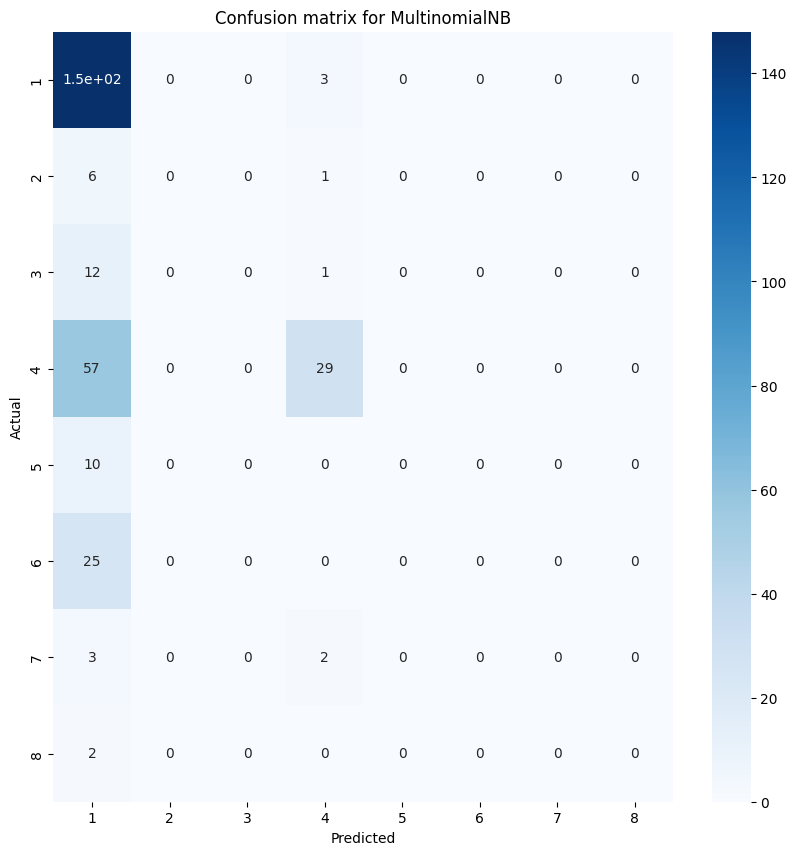

In [39]:
import seaborn as sns

model = models[2]
conf_matrix = metrics.confusion_matrix(y_test.reshape(-1,1),model.predict(X_test).reshape(-1,1))

plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',xticklabels=[1,2,3,4,5,6,7,8],yticklabels=[1,2,3,4,5,6,7,8])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion matrix for {type(model).__name__}')
plt.show()

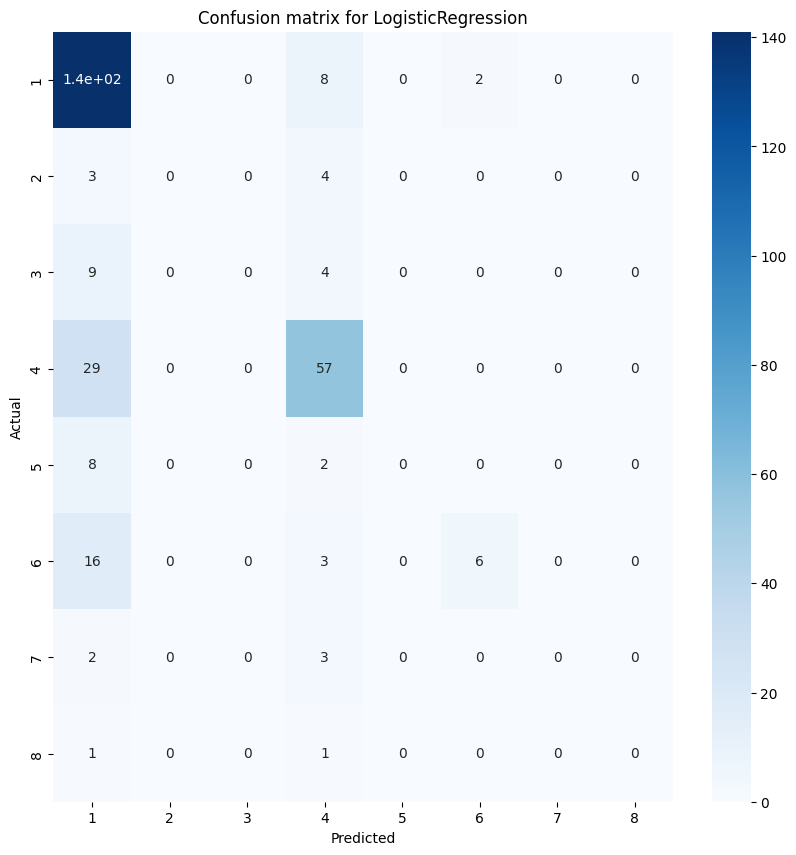

In [40]:
import seaborn as sns

model = models[3]
conf_matrix = metrics.confusion_matrix(y_test.reshape(-1,1),model.predict(X_test).reshape(-1,1))

plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',xticklabels=[1,2,3,4,5,6,7,8],yticklabels=[1,2,3,4,5,6,7,8])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion matrix for {type(model).__name__}')
plt.show()

In [36]:
from sklearn.metrics import roc_curve, auc



[LinearSVC(), RandomForestClassifier(), MultinomialNB(), LogisticRegression()]